1. utilizando algoritmos de machine learning (clustering: KMEANS, DBSCAN), ¿cuales son los segmetos de consumidores?¿que caracteristcia tiene?

2. ¿Sobre que target/segmento de consumidores podemmso trazar estrategias de marketing?

In [437]:
import pandas as pd  # Importamos Pandas para el manejo de datos
import numpy as np   # Importamos NumPy para cálculos numéricos
import seaborn as sns  # Importamos Seaborn para visualización de datos
import matplotlib.pyplot as plt  # Importamos Matplotlib para visualización adicional
from sklearn import datasets  # Importamos el módulo datasets de Scikit-learn
from sklearn.cluster import DBSCAN  # Importamos DBSCAN para clustering
from sklearn.datasets import make_circles  # Importamos make_circles para generar datos sintéticos
from sklearn.preprocessing import MinMaxScaler  # Importamos MinMaxScaler para escalar datos
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score


In [438]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# KMeans

In [439]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [440]:
df.Gender = df["Gender"].apply(lambda x: "0" if x=="Male" else "1")
df.drop(columns=["CustomerID", "Gender"], inplace=True)

In [441]:
# sse=[]
# silhouettes=[]
# for k in range(2, 25):
#     entrenoKM = KMeans(n_clusters=k, random_state=42)
#     entrenoKM.fit_predict(df)

#     labels=entrenoKM.labels_
#     silhouettes.append(silhouette_score(df, labels))
#     sse.append(entrenoKM.inertia_)

In [442]:
sse=[]
silhouettes=[]
for k in range(2,10):
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(df)


    sse.append(kmeans.inertia_)
    silh = silhouette_score(df, kmeans.predict(df), random_state=42)
    silhouettes.append(silh)

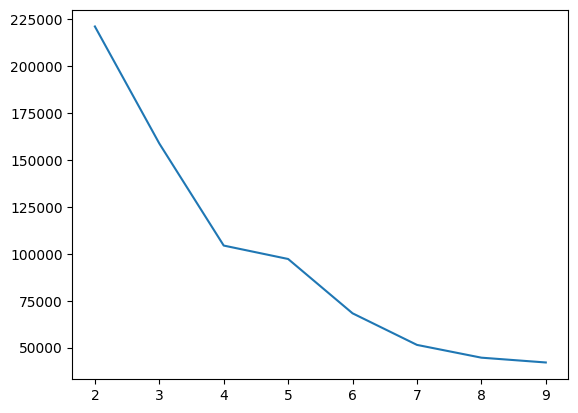

In [443]:
sse
silhouettes
plt.plot(range(2, 10),sse)

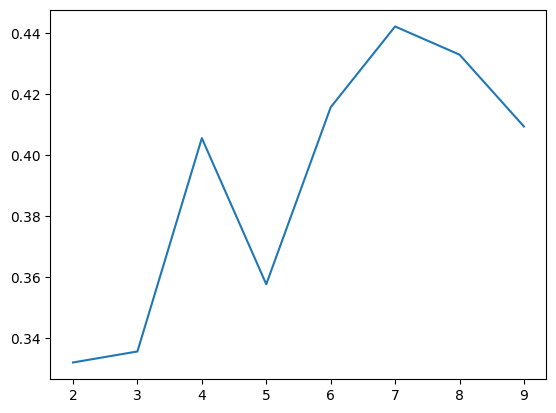

In [444]:
plt.plot(range(2, 10),silhouettes)

* voy a elegir k=6

In [445]:
kmeans=KMeans(n_clusters = 6)
kmeans.fit(df)

labels=kmeans.predict(df)
labels

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 2, 4, 2, 0,
       5, 4, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 3, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [446]:
kmeans.cluster_centers_

array([[27.        , 56.65789474, 49.13157895],
       [32.69230769, 86.53846154, 82.12820513],
       [56.15555556, 53.37777778, 49.08888889],
       [41.68571429, 88.22857143, 17.28571429],
       [25.27272727, 25.72727273, 79.36363636],
       [44.14285714, 25.14285714, 19.52380952]])

In [447]:
df['cluster']=labels
df.head()

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,5
1,21,15,81,4
2,20,16,6,5
3,23,16,77,4
4,31,17,40,5


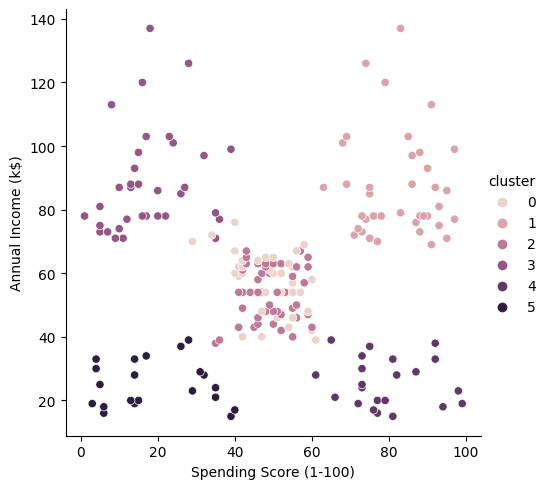

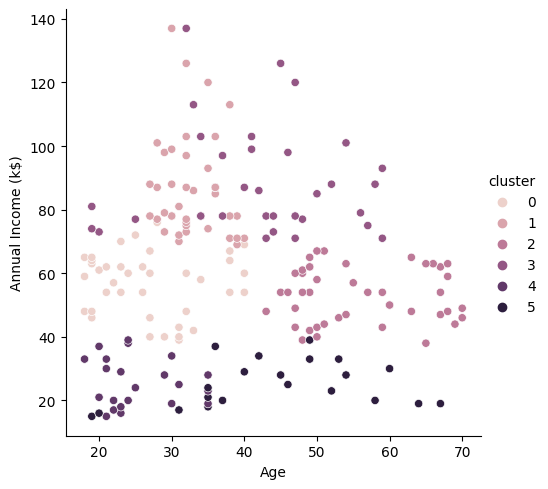

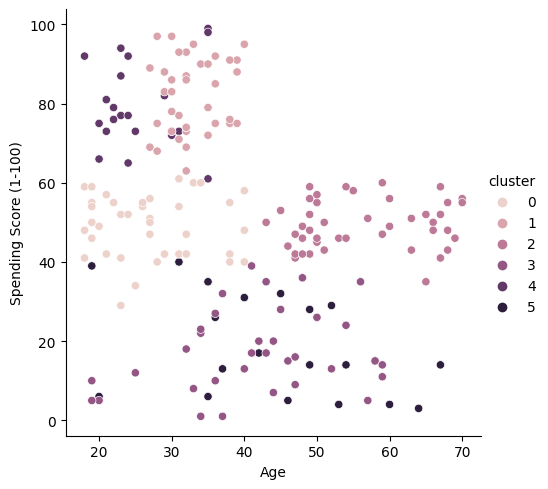

In [448]:
sns.relplot(data=df, x= "Spending Score (1-100)", y = "Annual Income (k$)", hue='cluster')
sns.relplot(data=df, x="Age", y =  "Annual Income (k$)", hue='cluster')
sns.relplot(data=df, x="Age", y =  "Spending Score (1-100)", hue='cluster')
plt.show()

In [449]:
import plotly.graph_objects as go

# Crear figura 3D
fig = go.Figure(data=[go.Scatter3d(
    x=df['Spending Score (1-100)'],
    y=df['Annual Income (k$)'],
    z=df['Age'],
    mode='markers',
    marker=dict(
        size=8,
        color=df['cluster'],  # Colorear por cluster
        colorscale='Viridis',  # Paleta de colores
        opacity=0.8
    )
)])
# Configurar título y etiquetas de ejes
fig.update_layout(
    title='Gráfico de Dispersión 3D con Plotly',
    scene=dict(
        xaxis_title='Spending Score (1-100)',
        yaxis_title='Annual Income (k$)',
        zaxis_title='Age'
    )
)
# Mostrar gráfico
fig.show()

In [450]:

# # Crear figura 3D
# fig = go.Figure(data=[go.Scatter3d(
#     x=df['Spending Score (1-100)'],
#     y=df['Annual Income (k$)'],
#     z=df['Gender'],
#     mode='markers',
#     marker=dict(
#         size=8,
#         color=df['cluster'],  # Colorear por cluster
#         colorscale='Viridis',  # Paleta de colores
#         opacity=0.8
#     )
# )])
# # Configurar título y etiquetas de ejes
# fig.update_layout(
#     title='Gráfico de Dispersión 3D con Plotly',
#     scene=dict(
#         xaxis_title='Spending Score (1-100)',
#         yaxis_title='Annual Income (k$)',
#         zaxis_title='Gender'
#     )
# )
# # Mostrar gráfico
# fig.show()

# DBSCAN

In [451]:
df2 = pd.read_csv("Mall_Customers.csv")
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [452]:
df2.Gender = df2["Gender"].apply(lambda x: "0" if x=="Male" else "1")
df2.drop(columns=["CustomerID", "Gender"], inplace=True)

In [453]:
from sklearn.neighbors import NearestNeighbors

In [454]:
vecinos = NearestNeighbors(n_neighbors=5)
nbrs = vecinos.fit(df2)
distancias, indices = nbrs.kneighbors(df2)

Text(0, 0.5, 'Distancia')

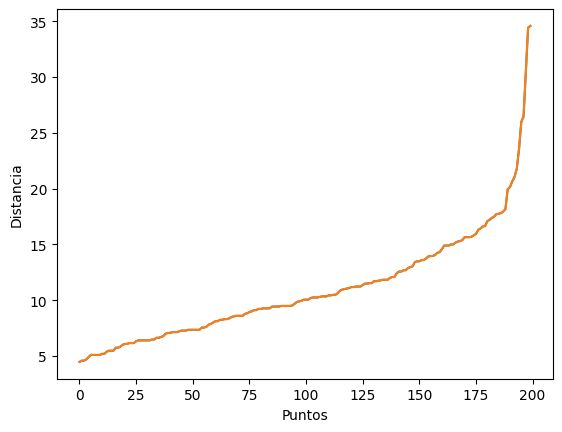

In [455]:
distancias = np.sort(distancias, axis=0)
distancias = distancias[:, 4]
plt.plot(distancias)
plt.plot(distancias)
plt.xlabel("Puntos")
plt.ylabel("Distancia")

* eligo el 30, que es donde la curva deja de ser tan pendinete

In [456]:
entrenoDB = DBSCAN(eps=15, min_samples=10).fit(df2)
clusterDB = entrenoDB.labels_

In [457]:
# Crear figura 3D
fig = go.Figure(data=[go.Scatter3d(
    x=df2['Spending Score (1-100)'],
    y=df2['Annual Income (k$)'],
    z=df2['Age'],
    mode='markers',
    marker=dict(
        size=8,
        color=clusterDB,  # Colorear por cluster
        colorscale='Viridis',  # Paleta de colores
        opacity=0.8
    )
)])
# Configurar título y etiquetas de ejes
fig.update_layout(
    title='Gráfico de Dispersión 3D con Plotly',
    scene=dict(
        xaxis_title='Spending Score (1-100)',
        yaxis_title='Annual Income (k$)',
        zaxis_title='Age'
    )
)
# Mostrar gráfico
fig.show()

* podria crear una columna con el dinero qeu gasatan y veo qeu grupo me merece mas la penam